In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df=pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    int64  
 3   placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [74]:
# Preprocessing
df=df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


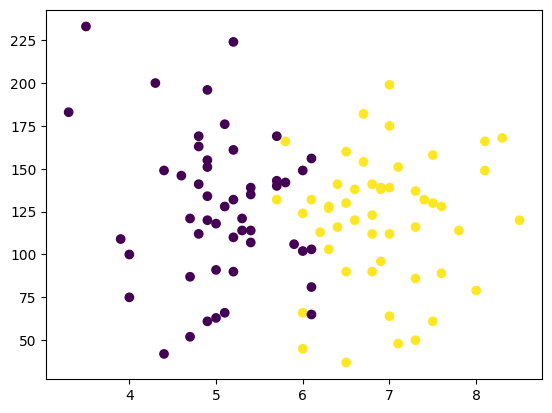

In [75]:
# EDA
x=df['cgpa']
y=df['iq']
plt.scatter(x,y,c=df['placement'])
plt.show()

In [76]:
# Extract input and output cols
x=df.iloc[:,:2]
y=df.iloc[:,-1]

In [77]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [78]:
x_train

,cgpa,iq
17,3.3,183
43,6.8,141
87,5.7,132
42,7.6,89
39,4.6,146
...,...,...
8,6.1,156
50,3.5,233
84,5.7,169
55,7.8,114


In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [80]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-2.33922295e+00,  1.48842006e+00],
       [ 6.90609407e-01,  4.56084679e-01],
       [-2.61623619e-01,  2.34869955e-01],
       [ 1.38314252e+00, -8.22044841e-01],
       [-1.21385664e+00,  5.78981748e-01],
       [-9.54156729e-01,  2.84028782e-01],
       [-1.92370308e-03, -5.02512461e-01],
       [-1.73325648e+00, -5.51671289e-01],
       [ 1.29657588e+00,  8.73934715e-01],
       [ 2.57776213e-01, -4.77933047e-01],
       [ 1.12344260e+00, -1.78064198e+00],
       [ 4.30909490e-01, -2.10017436e+00],
       [ 3.44342852e-01, -1.58400667e-01],
       [-1.75056980e-01,  1.07057003e+00],
       [-9.54156729e-01, -1.51026843e+00],
       [-1.92370308e-03,  6.52719990e-01],
       [ 6.90609407e-01,  1.36552299e-02],
       [ 7.77176045e-01,  3.82346438e-01],
       [ 1.71209574e-01, -2.32138909e-01],
       [ 2.57776213e-01,  1.36552299e-01],
       [ 6.90609407e-01, -2.56718322e-01],
       [-6.94456813e-01,  2.49617603e+00],
       [-2.61623619e-01,  5.05243507e-01],
       [ 1.

In [81]:
x_test=scaler.transform(x_test)
x_test

array([[ 0.60404277,  0.77561706],
       [ 0.77717605,  0.40692585],
       [-0.86759009, -0.10924184],
       [-1.04072337,  0.99683178],
       [-1.04072337,  1.14430827],
       [-0.86759009, -1.4611096 ],
       [ 1.21000924,  0.23486995],
       [ 0.51747613,  0.38234644],
       [ 0.43090949,  0.18571113],
       [-0.69445681,  0.23486995]])

In [82]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [83]:
# Model Training
clf.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_pred=clf.predict(x_test)

In [85]:
y_test

,placement
74,1
60,1
67,0
34,0
75,0
7,0
3,1
48,1
57,1
19,0


In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

<Axes: >

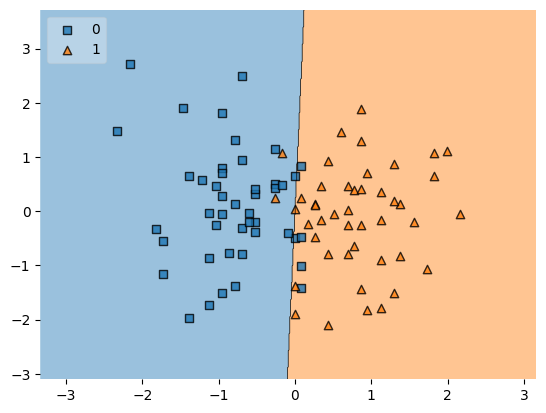

In [87]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [89]:
import pickle

In [90]:
pickle.dump(clf,open('model.pkl','wb'))